In [84]:
%matplotlib inline
import analysis
import matplotlib
import warnings
import logging
import sys
from importlib import reload
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.ERROR, stream=sys.stdout)

reload(analysis)

a = analysis.Analysis()
a.log.setLevel(logging.INFO)
#a.log.setLevel(logging.DEBUG)


result = '../spa_result/Analysis_Results/graviton3/metrics_analysis_1646764397.055865.csv'
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = figsize=(20, 5)
plt.rcParams["figure.dpi"] = dpi=100
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14

sns.set_palette('husl', 8)
analysis.css_styling()

/home/tuscho01/charms/python_graphs/lab-charms/lib/jujubench/util.py:51: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yml.read())


In [85]:
df_v1 = pd.read_csv(result)

print(df_v1[["Events", "Values", "Values_list"]])

                         Events        Values                                        Values_list
0                           IPC  1.302893e-01      [0.13119549 0.12815059 0.12764007 0.13417091]
1                      L1I MPKI  5.306563e+02  [526.80222066 538.54775827 542.59918188 514.67...
2                  L1I_TLB MPKI  3.861347e+01  [38.4057457  39.22279629 39.39558199 37.42976849]
3                  L1D_TLB MPKI  5.066796e-01      [0.41516198 0.46794348 0.44132401 0.70228901]
4                  L2D_TLB MPKI  3.359989e+01  [33.25518159 34.17562    34.34180235 32.62694111]
5                      L1D MPKI  8.279873e-01      [0.89319709 0.668259   0.61835698 1.13213618]
6                      L2D MPKI  5.302445e+02  [526.52392254 539.63169248 543.67811901 511.14...
7                   BRANCH MPKI  3.979751e+01  [39.25178075 40.33135786 41.57365619 38.03323016]
8                DTLB_WALK MPKI  2.311215e-02      [0.03039626 0.0196382  0.01694112 0.02547301]
9                ITLB_WALK MPK

In [86]:
 # Performance Metric Grpahs

def plot_metrics(df, query):
    
    df_new = df.query(query)


    ax, tmp = a.graph('Events', 'Values',do_not_sort = True, title = ('XGBOOST'),
        xlabel='Events',ylabel='Values' , label = True, data = df_new, kind = 'bar')

In [114]:
def plot_timeseries(df, event, title, ylabel, show = 0):


    df_ts = df.query(event)

    values_list = str(df_ts['Values_list'].values).strip()
    #print(values_list)
    values_list = values_list.replace("\\n", " ")

    values_list = values_list[3:-3].strip().split(' ')
    #print(values_list)

    values_list = [float(a) for a in values_list if a]
    #print(values_list)
    if show == 1:
        plt.plot(y4_data, label="IPC")
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()
    else:
        return values_list
    

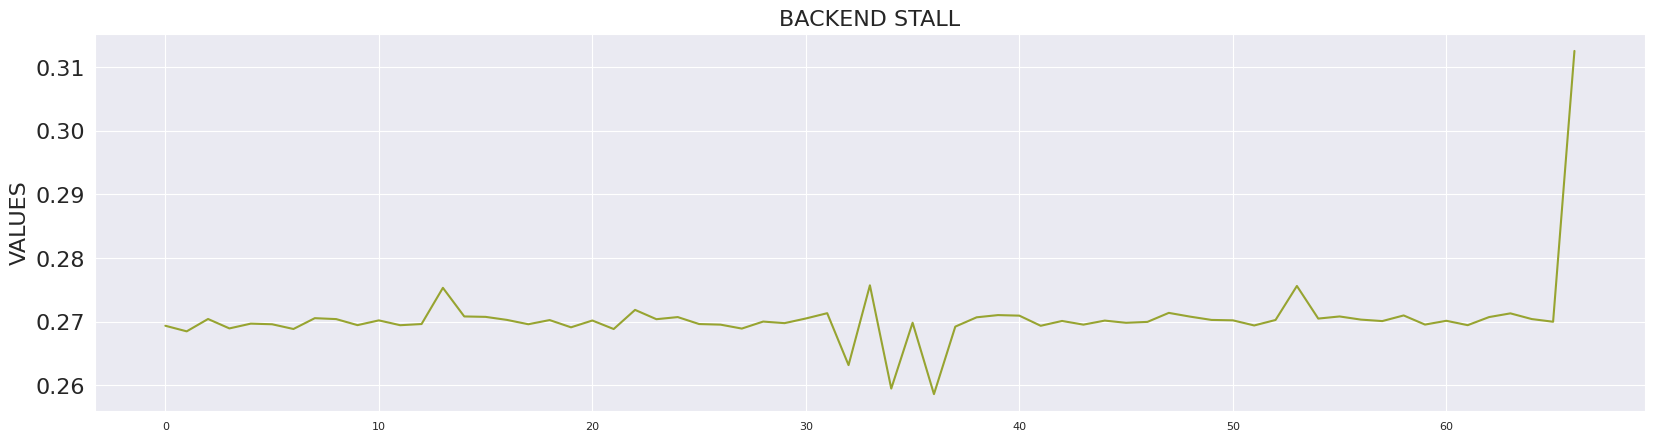

In [115]:
plot_timeseries(df_v1, "Events == 'BACKEND_STALL'", "BACKEND STALL", "VALUES", 1)

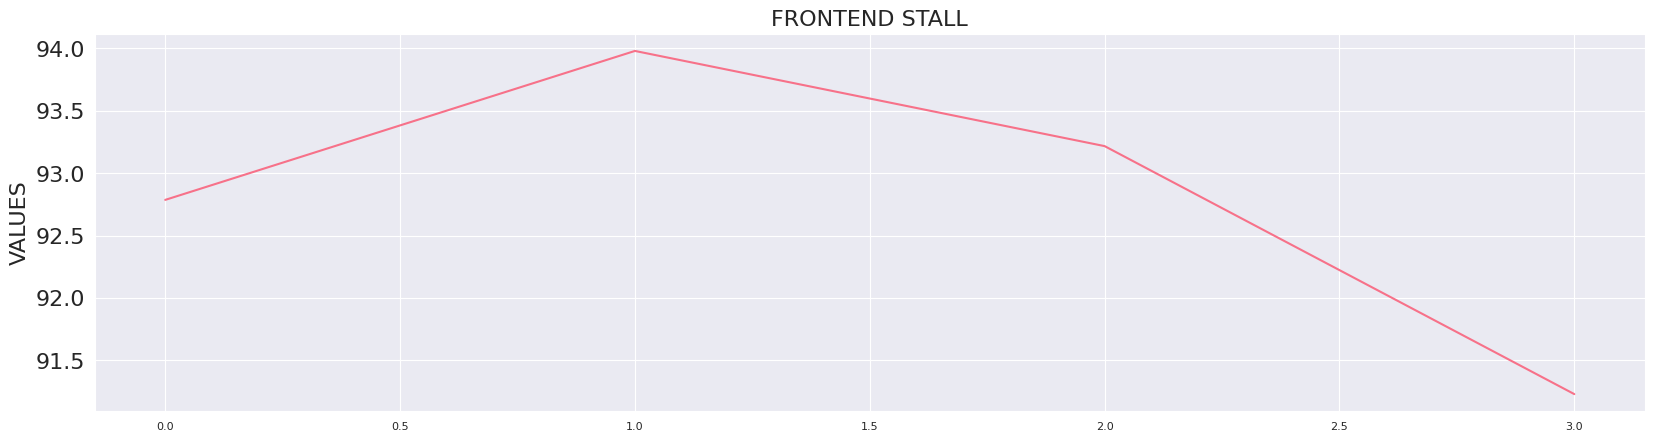

In [89]:
plot_timeseries(df_v1, "Events == 'FRONTEND_STALL'", "FRONTEND STALL", "VALUES")

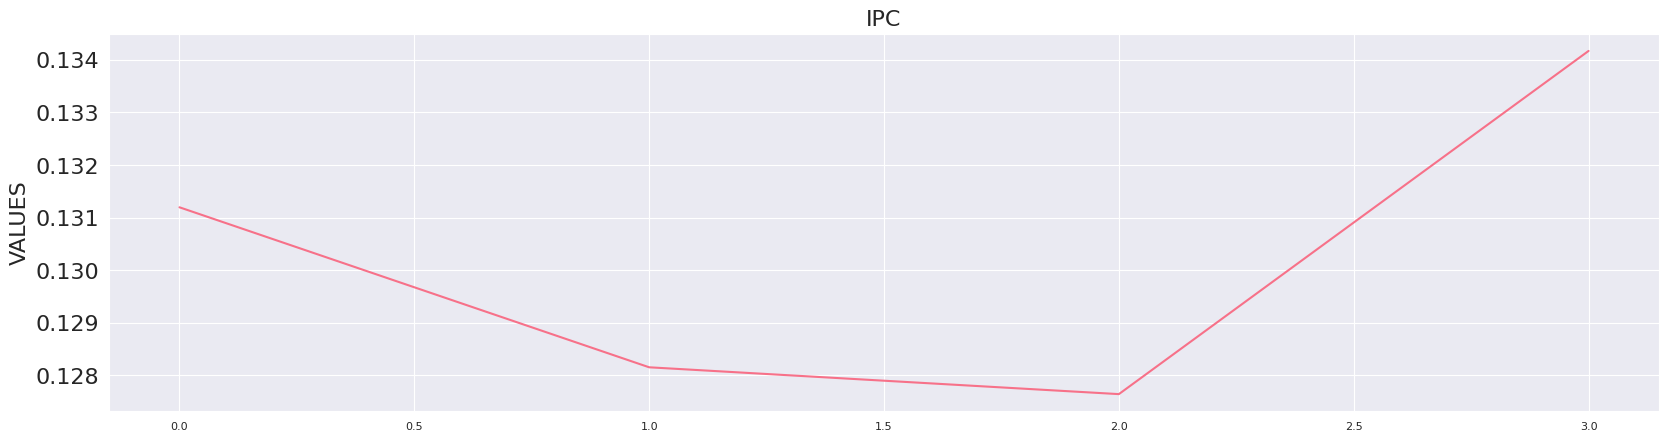

In [90]:
plot_timeseries(df_v1, "Events == 'IPC'", "IPC", "VALUES")

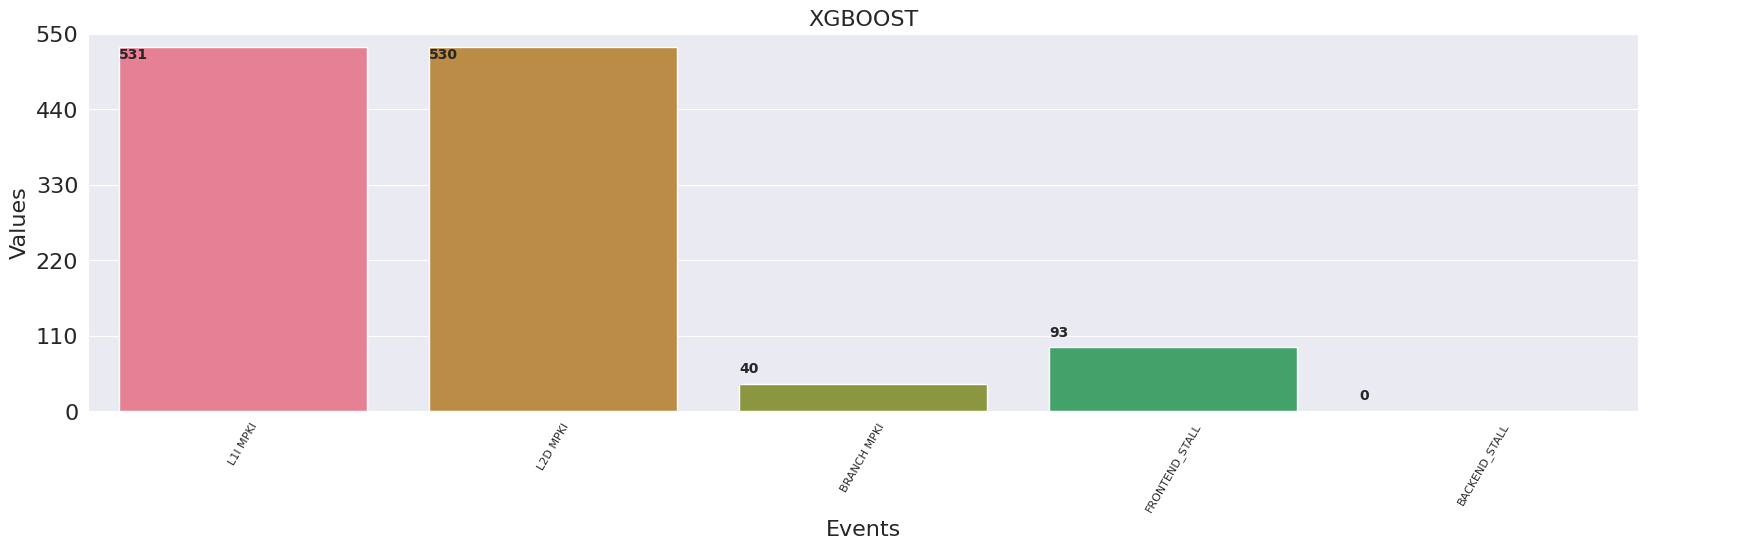

In [91]:
plot_metrics(df_v1, 'Events == "FRONTEND_STALL" or Events == "BRANCH MPKI" or Events == "L2D MPKI" or Events == "L1I MPKI" or Events == "BACKEND_STALL" ')

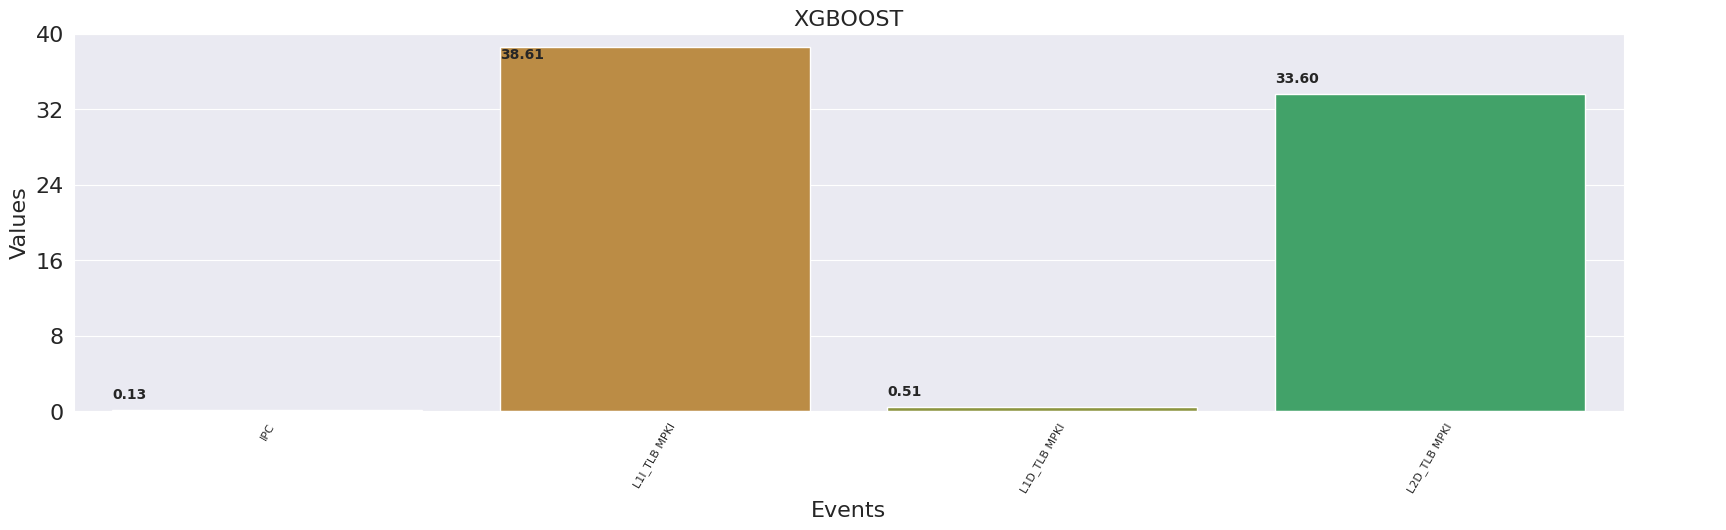

In [92]:
plot_metrics(df_v1, 'Events == "IPC" or Events == "L2D_TLB MPKI" or Events == "L1I_TLB MPKI" or Events == "L1D_TLB MPKI" ')

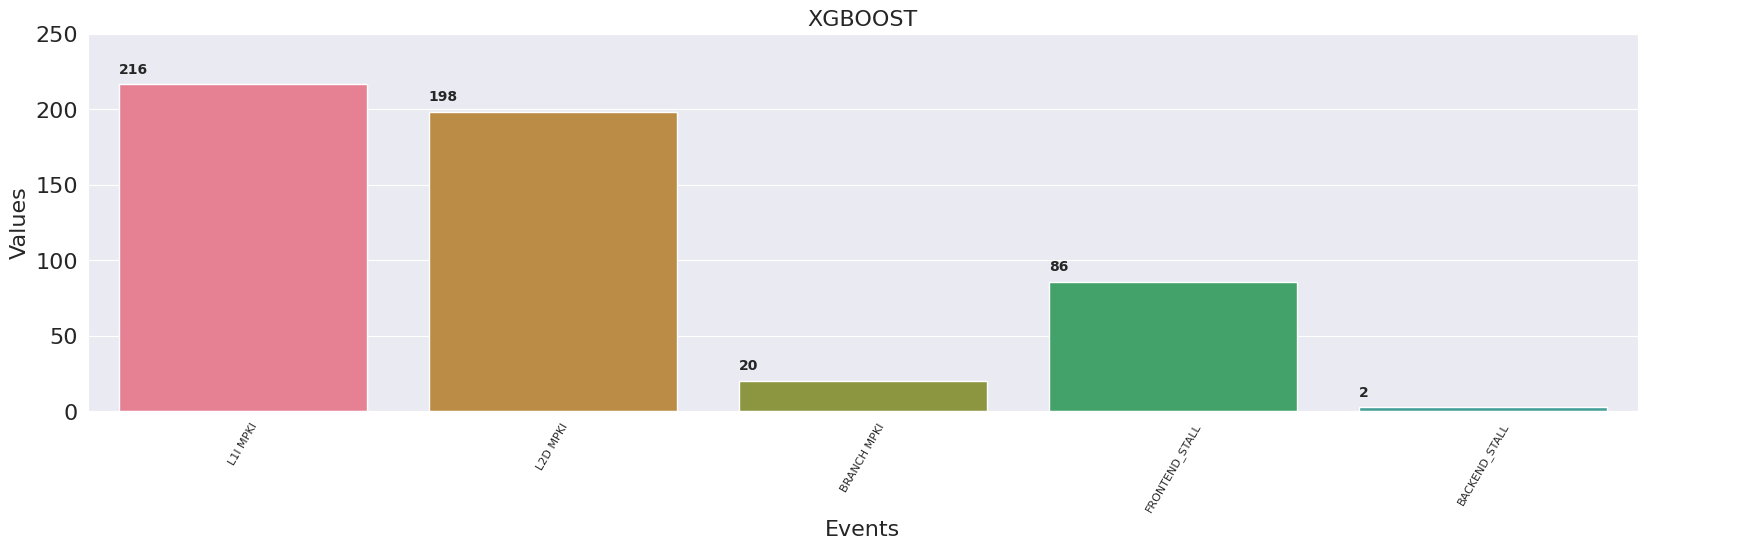

In [93]:
path = '../spa_result/Analysis_Results/graviton2/metrics_analysis_1646773508.012399.csv'
df_n1 = pd.read_csv(path)

plot_metrics(df_n1, 'Events == "FRONTEND_STALL" or Events == "BRANCH MPKI" or Events == "L2D MPKI" or Events == "L1I MPKI" or Events == "BACKEND_STALL" ')



In [94]:
df_total = pd.concat([df_v1, df_n1])

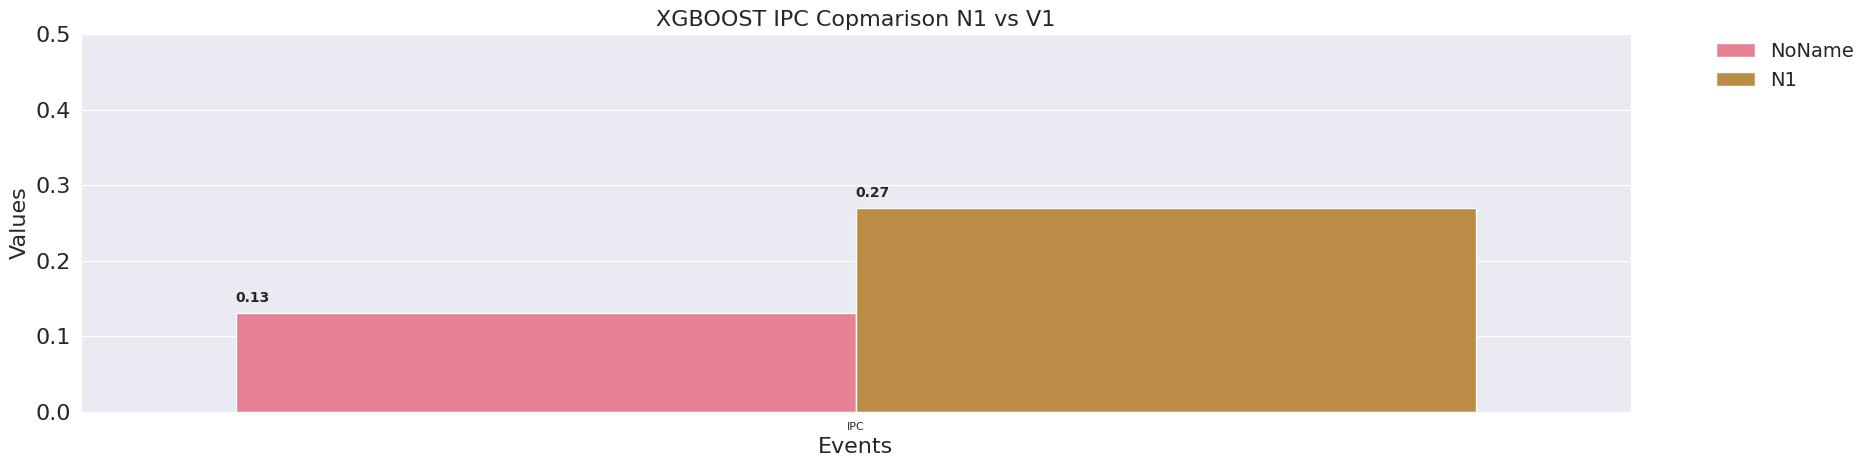

In [95]:
df_total_new = df_total.query('Events == "IPC"')
ax, tmp = a.graph('Events', 'Values',key_cols=["Names"], do_not_sort = True, 
                  title = ('XGBOOST IPC Copmarison N1 vs V1'), xlabel='Events',ylabel='Values' , label = True, data = df_total_new, kind = 'bar')



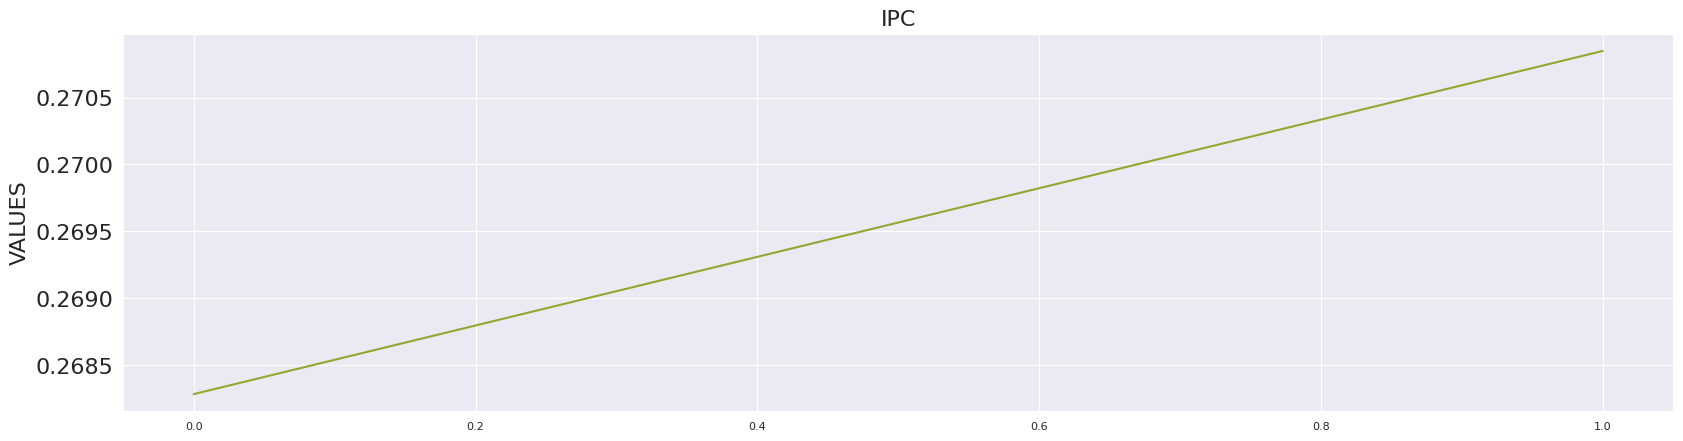

In [96]:
plot_timeseries(df_n1, "Events == 'IPC'", "IPC", "VALUES")

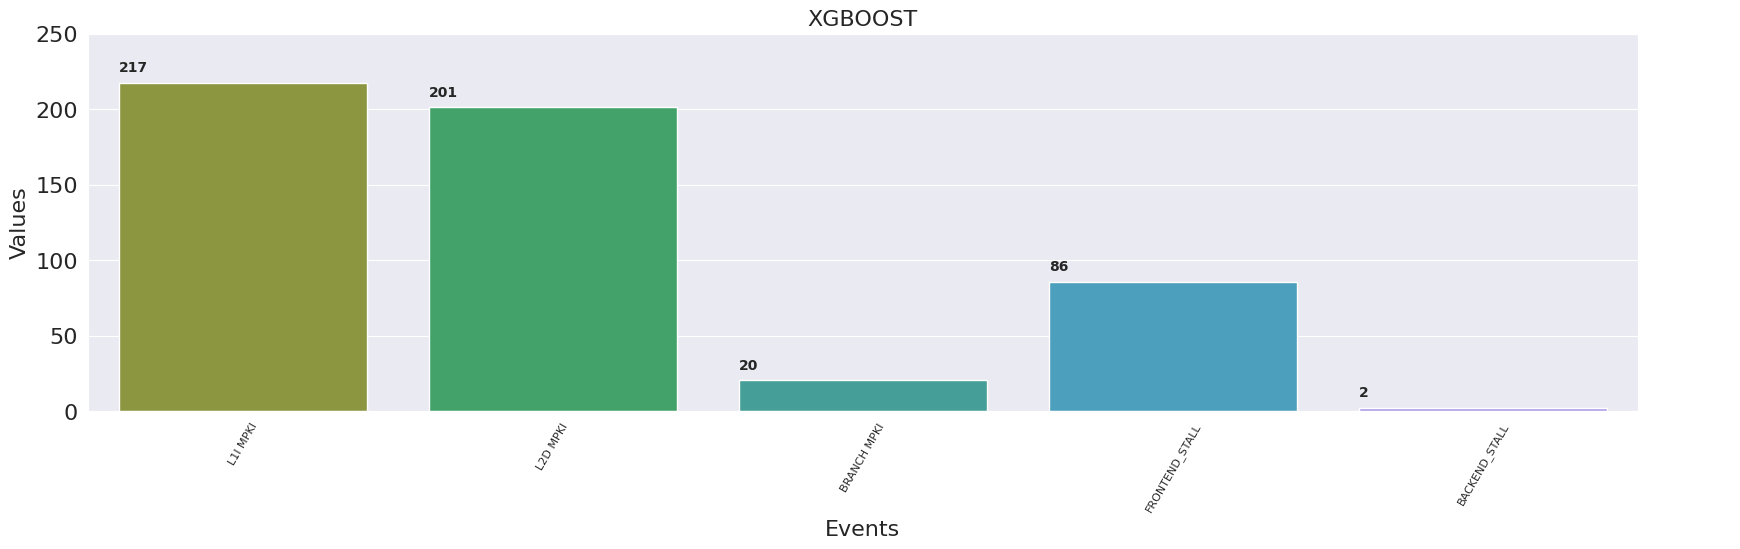

In [97]:
path = '../spa_result/Analysis_Results/graviton2/metrics_analysis_1646867292.305662.csv'
df_n1_2 = pd.read_csv(path)

plot_metrics(df_n1_2, 'Events == "FRONTEND_STALL" or Events == "BRANCH MPKI" or Events == "L2D MPKI" or Events == "L1I MPKI" or Events == "BACKEND_STALL" ')


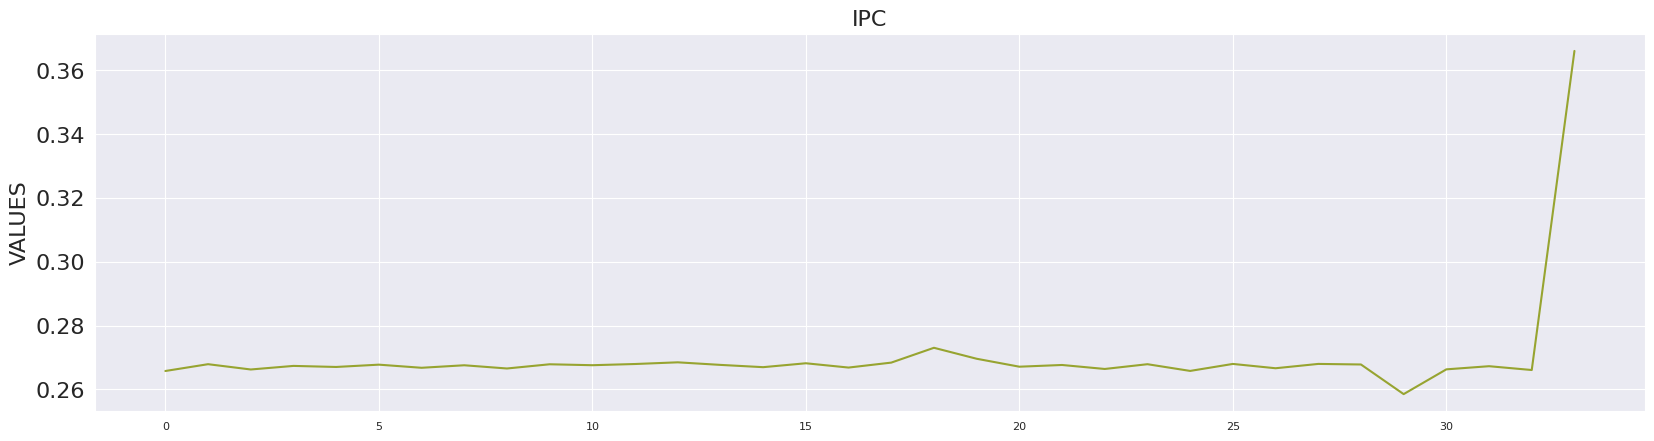

In [98]:
plot_timeseries(df_n1_2, "Events == 'IPC'", "IPC", "VALUES", 1)

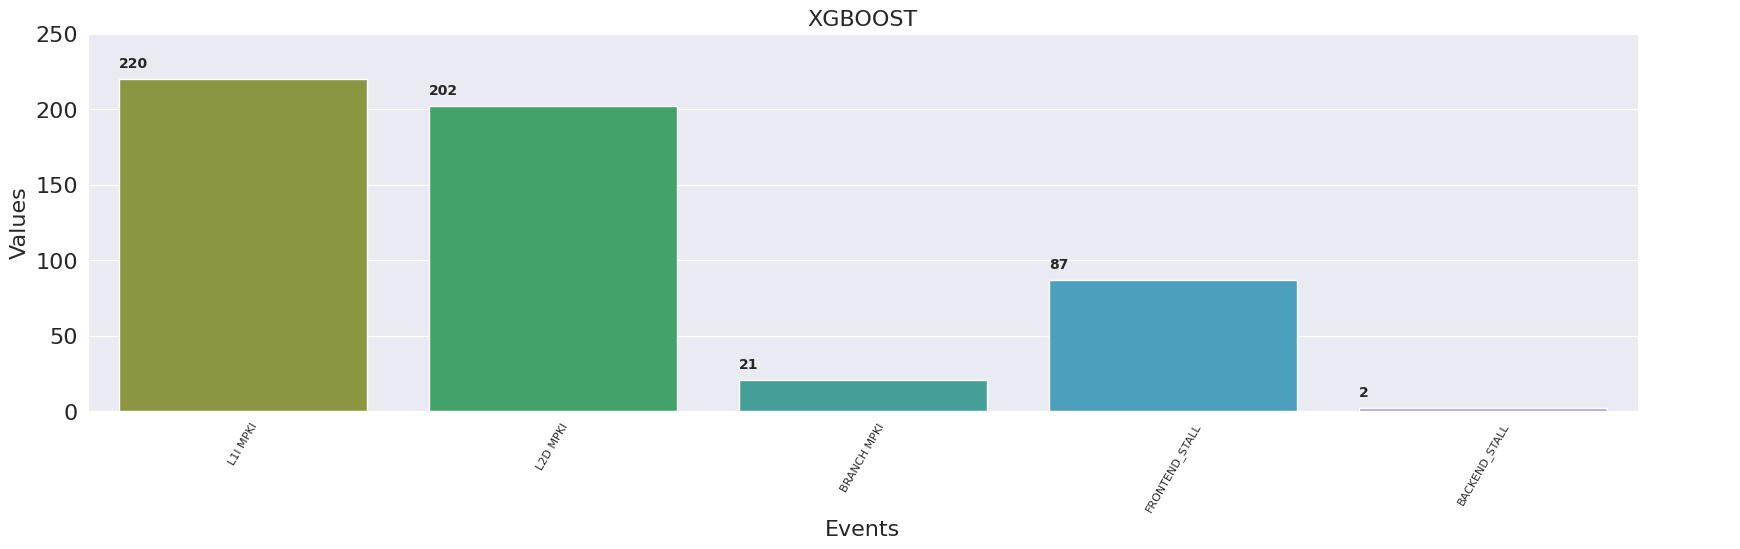

In [99]:

path = '../spa_result/Analysis_Results/graviton2/metrics_analysis_1646878677.93568.csv'
df_n1_3 = pd.read_csv(path)

plot_metrics(df_n1_3, 'Events == "FRONTEND_STALL" or Events == "BRANCH MPKI" or Events == "L2D MPKI" or Events == "L1I MPKI" or Events == "BACKEND_STALL" ')


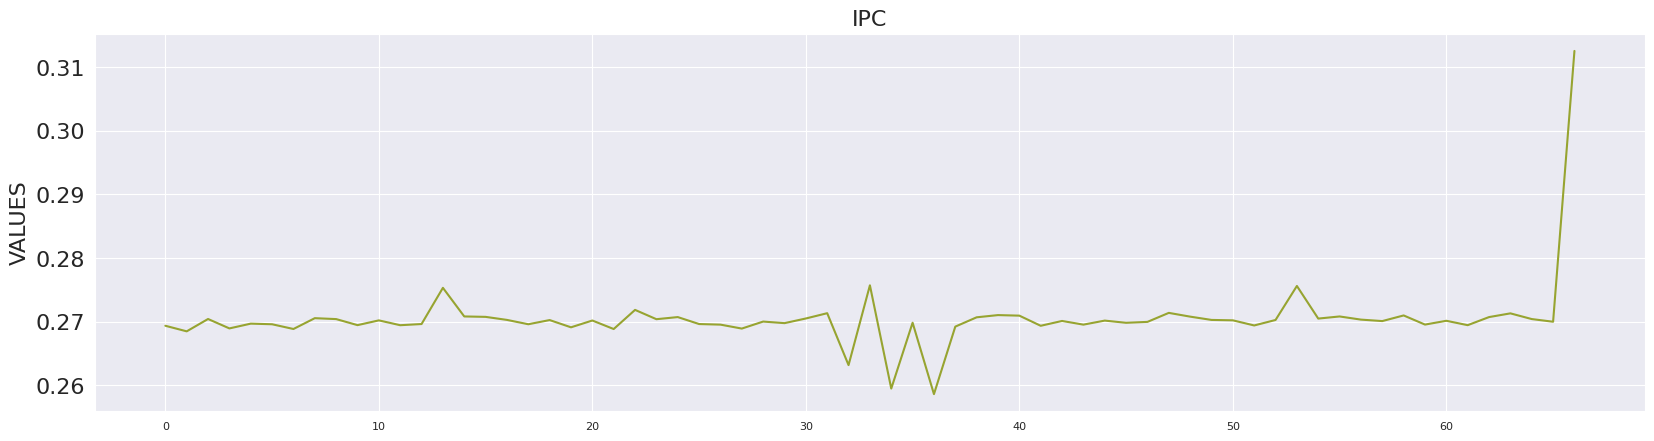

In [100]:
plot_timeseries(df_n1_3, "Events == 'IPC'", "IPC", "VALUES")

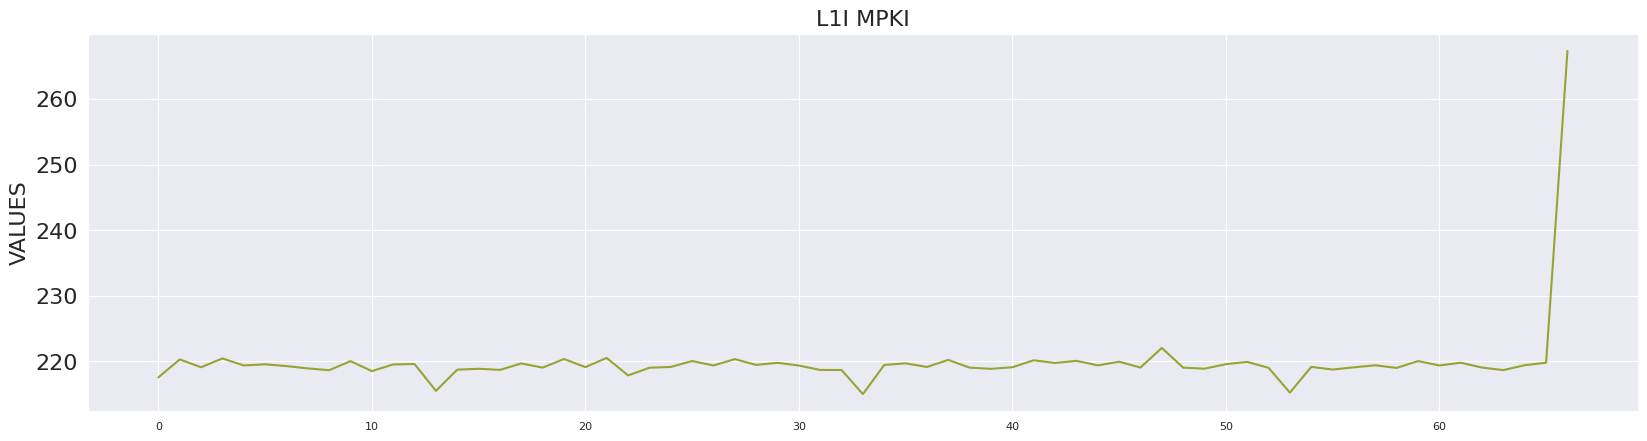

In [102]:
plot_timeseries(df_n1_3, "Events == 'L1I MPKI'", "L1I MPKI", "VALUES")

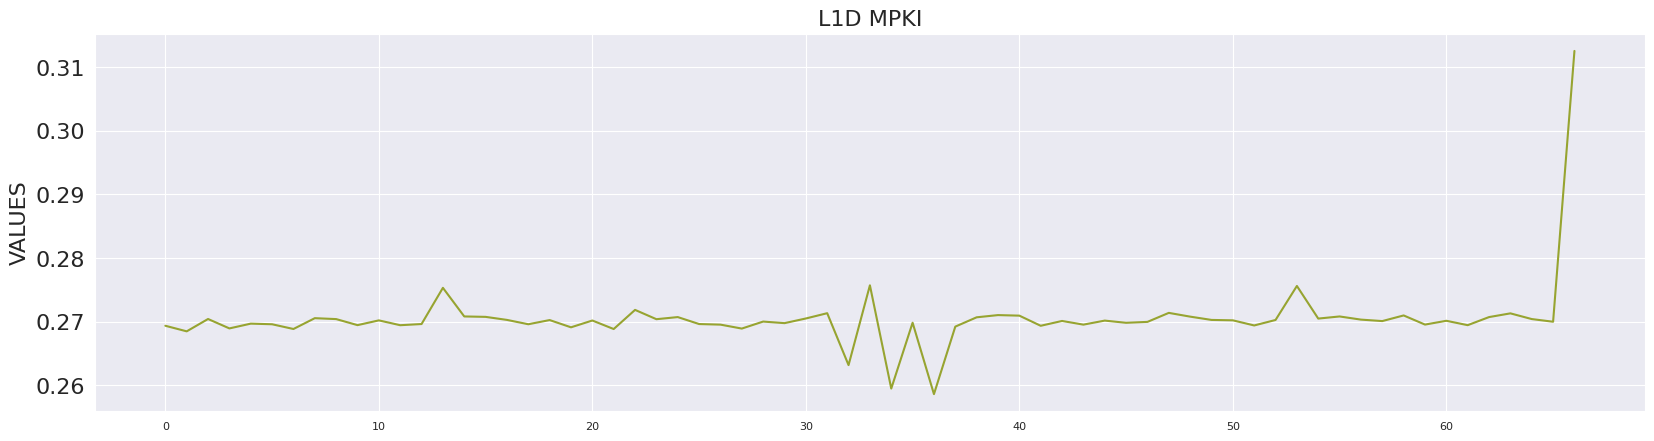

In [117]:
plot_timeseries(df_n1_3, "Events == 'L1D MPKI'", "L1D MPKI", "VALUES", 1)

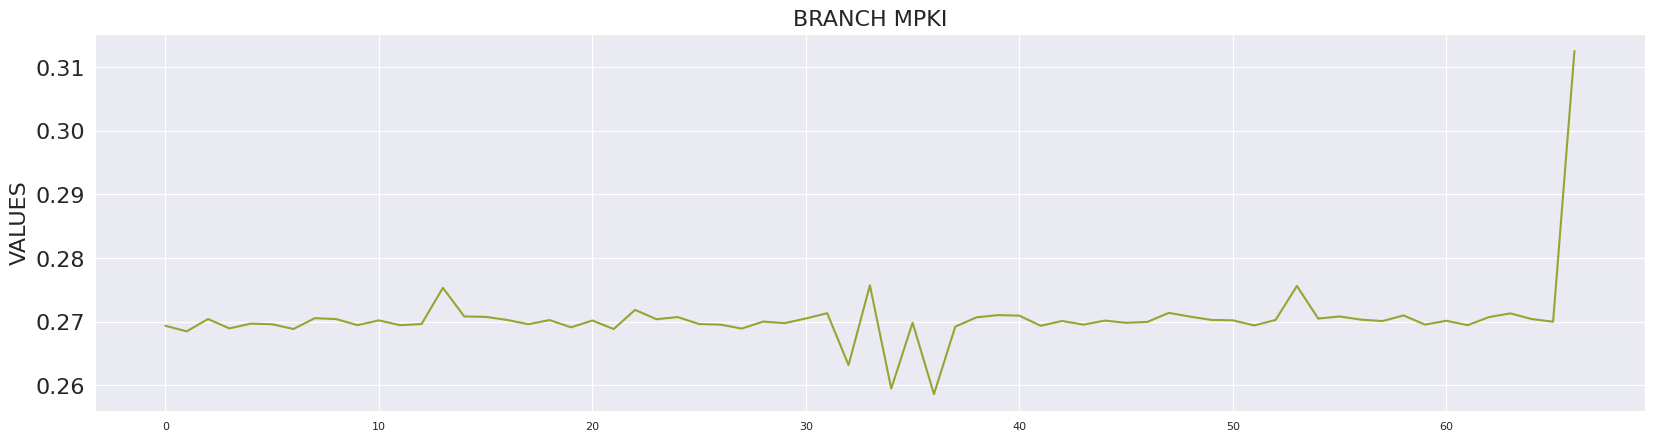

In [116]:
plot_timeseries(df_n1_3, "Events == 'BRANCH MPKI'", "BRANCH MPKI", "VALUES", 1)

In [129]:
y1_data = plot_timeseries(df_n1_3, "Events == 'L2D MPKI'", "L2D MPKI", "VALUES")
y2_data = plot_timeseries(df_n1_3, "Events == 'L1I MPKI'", "L1I MPKI", "VALUES")
y3_data = plot_timeseries(df_n1_3, "Events == 'BRANCH MPKI'", "L1I MPKI", "VALUES")
y4_data = plot_timeseries(df_n1_3, "Events == 'IPC'", "L1I MPKI", "VALUES")
y5_data = plot_timeseries(df_n1_3, "Events == 'L1D MPKI'", "L1I MPKI", "VALUES")
fs_data = plot_timeseries(df_n1_3, "Events == 'FRONTEND_STALL'", "L1I MPKI", "VALUES")
bs_data = plot_timeseries(df_n1_3, "Events == 'BACKEND_STALL'", "L1I MPKI", "VALUES")

y5_data = plot_timeseries(df_n1_3, "Events == 'L1D MPKI'", "L1I MPKI", "VALUES")



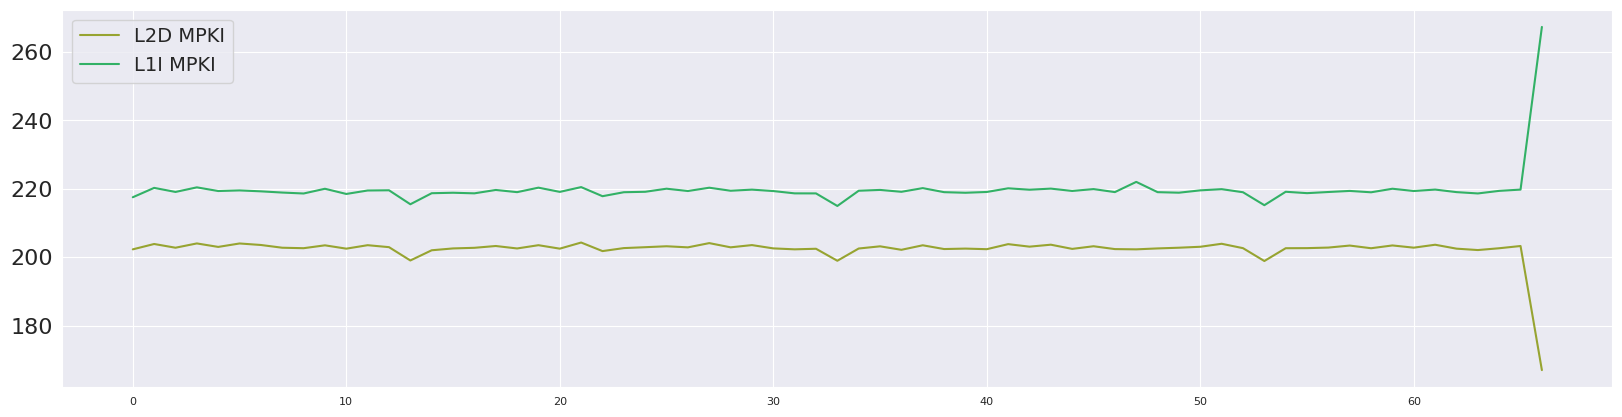

In [124]:
plt.plot(y1_data, label="L2D MPKI")
plt.plot(y2_data, label="L1I MPKI")

plt.legend()

plt.show()

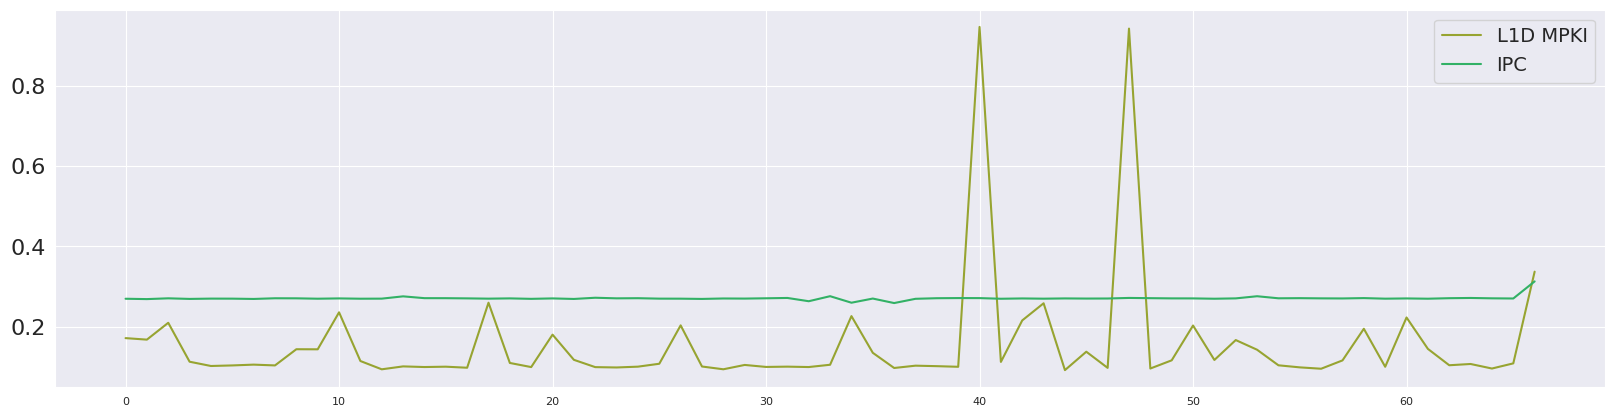

In [132]:
plt.plot(y5_data, label="L1D MPKI")
plt.plot(y4_data, label="IPC")


plt.legend()
plt.show()

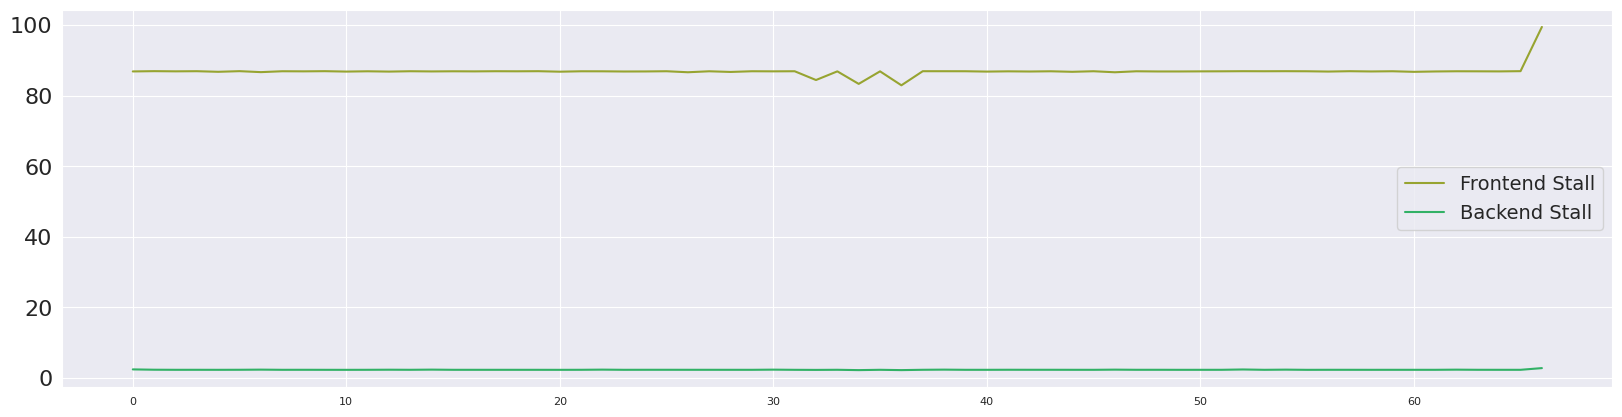

In [131]:
plt.plot(fs_data, label="Frontend Stall")
plt.plot(bs_data, label="Backend Stall")

plt.legend()
plt.show()